In [1]:
#!pip3 install scikit-learn numpy matplotlib

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'png'
plt.style.use('ggplot')

In [2]:
X, y = make_blobs(
    n_samples=5000,
    centers=2,
    center_box=(-3.0, 3.0),
    random_state=5150
)

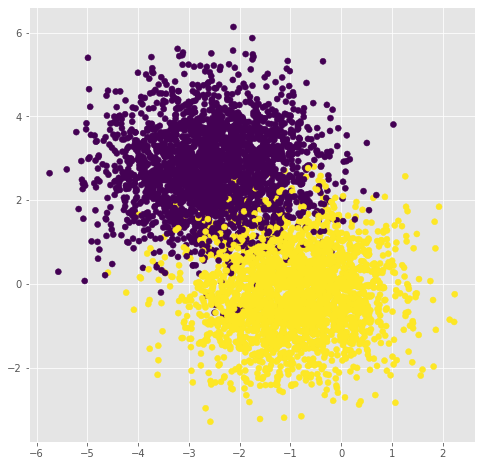

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

![Neuron]('neuron.png')
![Learning]('learning.png')
![ANN]('ann.png')

- Chollet, F (2017). Deep Learning with Python
- https://en.wikipedia.org/wiki/Artificial_neural_network
- https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf
- https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

In [4]:
class relu:
    def __init__(self):
        pass
    
    @staticmethod
    def forward(Z):
        return np.maximum(0, Z)

    @staticmethod
    def backward(dA, Z):
        return np.where(Z <= 0, 0, dA.T)
    
class sigmoid:
    def __init__(self):
        pass
    
    @staticmethod
    def forward(Z):
        return 1/(1+np.exp(-Z))
    
    @staticmethod
    def backward(dA, Z):
        sig = sigmoid.forward(Z)
        return dA * sig * (1 - sig)

In [5]:
def init_layers(architecture, seed=None):
    if seed: np.random.seed(seed)
    params_values = {'number_of_layers': len(architecture)}

    for idx, layer in enumerate(architecture):
        
        input_size = layer['input_dim']
        output_size = layer['output_dim']
        activation = layer['activation']
        
        params_values['W' + str(idx)] = np.random.randn(input_size, output_size) * 0.1
        params_values['b' + str(idx)] = np.zeros(output_size)
        params_values['activation' + str(idx)] = activation
        
    return params_values

In [6]:
def full_forward_propagation(X, model):
    
    def single_layer_forward_propagation(A, W, b, activation):
        Z = np.dot(A, W) + b
        A = activation.forward(Z)
        return A, Z

    memory = {}
    
    A_new = X
    for i in range(model['number_of_layers']):
        
        A_prev = A_new
        W =  model['W' + str(i)]
        b =  model['b' + str(i)]
        activation =  model['activation' + str(i)]
        
        A_new, Z = single_layer_forward_propagation(A_prev, W, b, activation)
        
        memory['A_prev' + str(i)] = A_prev
        memory['Z' + str(i)] = Z
               
    return A_new, memory

In [7]:
def full_backward_propagation(y_true, y_pred, memory, model):
    
    def single_layer_backward_propagation(dA, A_prev, Z, W, b, activation):
        m = A_prev.shape[1]
        dZ = activation.backward(dA, Z)
        dW = np.dot(dZ.T, A_prev) / m
        db = np.sum(dZ, axis=0) / m
        dA_prev = np.dot(W, dZ.T)
        return dA_prev, dW, db

    grad_values = {}
    y_true = y_true.reshape(y_pred.shape)
    
    dA = -(np.divide(y_true, y_pred) - np.divide(1 - y_true, 1 - y_pred))
    for i in reversed(range(model['number_of_layers'])):
        A_prev = memory["A_prev" + str(i)]
        Z = memory["Z" + str(i)]
        W = model["W" + str(i)]
        b = model["b" + str(i)]
        activation = model['activation' + str(i)]
                
        dA, dW, db = single_layer_backward_propagation(dA, A_prev, Z, W, b, activation)
        
        grad_values["dW" + str(i)] = dW
        grad_values["db" + str(i)] = db
    
    return grad_values

In [8]:
def update(model, grad_values, learning_rate):
    for i in range(model['number_of_layers']):
        model["W" + str(i)] -= learning_rate * grad_values["dW" + str(i)].T
        model["b" + str(i)] -= learning_rate * grad_values["db" + str(i)]

    return model

In [9]:
def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred.T) + (1 - y_true) * np.log(1 - y_pred.T)) / y_true.shape[0]

Epoch: 1 Loss: 0.6909201427503675


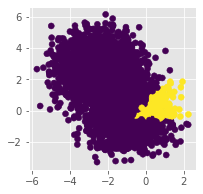

Epoch: 2 Loss: 0.6885402085105655


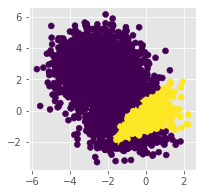

Epoch: 3 Loss: 0.6847404991116669


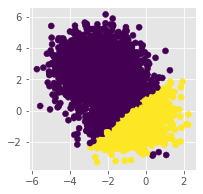

Epoch: 4 Loss: 0.6777182972200566


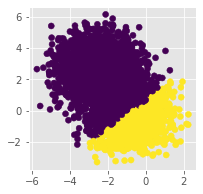

Epoch: 5 Loss: 0.6631980963489602


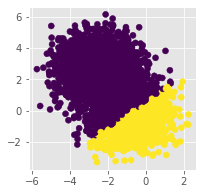

Epoch: 6 Loss: 0.6316910386247658


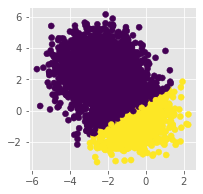

Epoch: 7 Loss: 0.5734565488894539


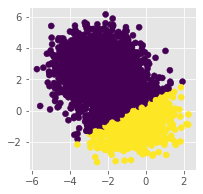

Epoch: 8 Loss: 0.5072032517491664


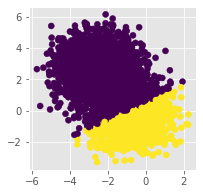

Epoch: 9 Loss: 0.4577455638304312


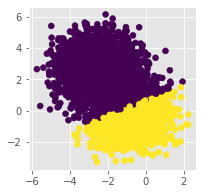

Epoch: 10 Loss: 0.42057828446605366


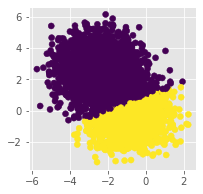

Epoch: 11 Loss: 0.38968825178015776


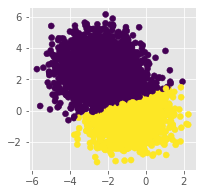

Epoch: 12 Loss: 0.36282644827242166


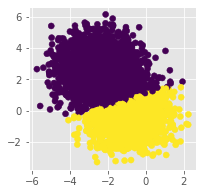

Epoch: 13 Loss: 0.3393406084373596


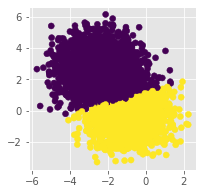

Epoch: 14 Loss: 0.3188420378167263


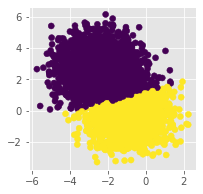

Epoch: 15 Loss: 0.30078176604704726


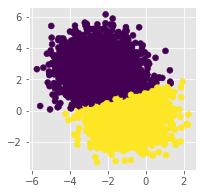

In [10]:
epochs = 15
learning_rate = 1e-3
batch_size = 32
number_of_batches = int(X.shape[0] / batch_size) + 1

architecture = [
    {'input_dim': 2, 'output_dim': 8, 'activation': relu},
    {'input_dim': 8, 'output_dim': 8, 'activation': relu},
    {'input_dim': 8, 'output_dim': 1, 'activation': sigmoid}
]
model = init_layers(architecture, seed=5150)

for epoch in range(1, epochs + 1):
    losses = []
    for batch in range(number_of_batches):
        start = batch * batch_size
        end = start + batch_size
        
        X_train = X[start: end]
        y_train = y[start: end]
        
        pred, memory = full_forward_propagation(X_train, model)
        grad_values = full_backward_propagation(y_train, pred, memory, model)
        model = update(model, grad_values, learning_rate)
        loss = cross_entropy(y_train, pred)
        losses.append(loss)
    
    print("Epoch:", epoch, "Loss:", np.mean(losses))
    y_pred, _ = full_forward_propagation(X, model)
    y_pred = np.where(y_pred > .5, 1, 0).reshape(-1)
    
    plt.figure(figsize=(3,3))
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.show()